In [1]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 46.8MB/s]


In [2]:
!unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df_og=df.copy(deep=True)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

In [7]:
df.select_dtypes(include='object')

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [8]:
def time(date):
  a=date.split('-')
  return pd.to_datetime(a[2]+'-'+a[1]+'-'+a[0])

In [9]:
df['Dt_Customer']=df['Dt_Customer'].apply(time)
df_og['Dt_Customer']=df_og['Dt_Customer'].apply(time)

In [10]:
df.drop('Dt_Customer',axis=1,inplace=True)
df_og.drop('Dt_Customer',axis=1,inplace=True)

In [11]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [12]:
df=pd.get_dummies(df,columns=['Marital_Status','Education'],drop_first=True)
df_og=pd.get_dummies(df_og,columns=['Marital_Status','Education'],drop_first=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Income                   2216 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   MntWines                 2240 non-null   int64  
 7   MntFruits                2240 non-null   int64  
 8   MntMeatProducts          2240 non-null   int64  
 9   MntFishProducts          2240 non-null   int64  
 10  MntSweetProducts         2240 non-null   int64  
 11  MntGoldProds             2240 non-null   int64  
 12  NumDealsPurchases        2240 non-null   int64  
 13  NumWebPurchases          2240 non-null   int64  
 14  NumCatalogPurchases     

In [14]:
from sklearn.decomposition import PCA
marital_cols = [col for col in df.columns if col.startswith("Marital_Status")]
education_cols = [col for col in df.columns if col.startswith("Education")]
pca_marital = PCA(n_components=1)
pca_education = PCA(n_components=1)
df["Marital_Status_PCA"] = pca_marital.fit_transform(df[marital_cols])
df["Education_PCA"] = pca_education.fit_transform(df[education_cols])
df.drop(marital_cols + education_cols, axis=1, inplace=True)

In [15]:
int_cols = df.select_dtypes(include='int64').columns
df[int_cols] = df[int_cols].astype(float)
df_og[int_cols] = df_og[int_cols].astype(float)

In [16]:
df.dropna(inplace=True)
df_og.dropna(inplace=True)

In [17]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2'])

In [18]:
df_pca.head()

,PC1,PC2
0,5895.142935,-75.750593
1,-5912.059498,-3403.282876
2,19363.174872,-1480.413506
3,-25602.178860,637.956994
4,6043.733713,-274.135309


In [19]:
pca.explained_variance_ratio_

array([0.98343637, 0.01638182])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)
df_pca = pd.DataFrame(df_pca_scaled, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,0.234226,-0.023320
1,-0.234899,-1.047687
2,0.769340,-0.455739
3,-1.017229,0.196393
4,0.240130,-0.084391


In [21]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit_predict(df_pca)

array([1, 0, 1, ..., 2, 2, 2], dtype=int32)

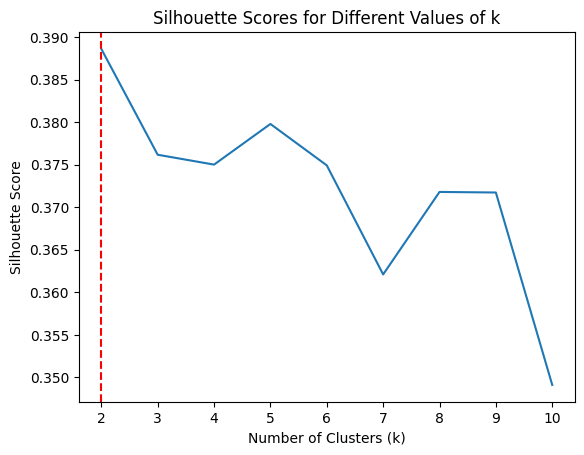

In [22]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit_predict(df_pca)
  silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))
max_silhouette_index = np.argmax(silhouette_scores)
plt.plot(range(2, 11), silhouette_scores)
plt.axvline(max_silhouette_index + 2, color='red', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.show()


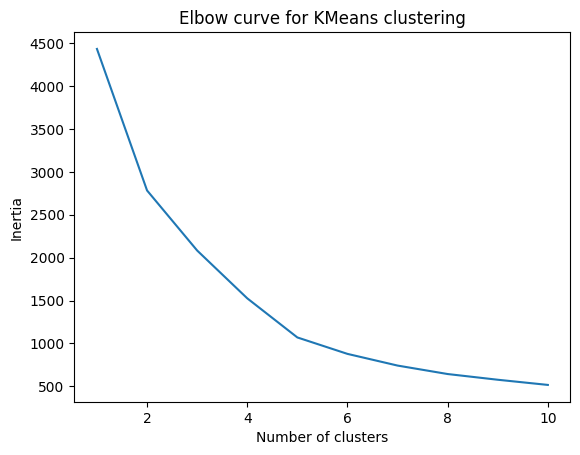

In [23]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_pca)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for KMeans clustering')
plt.show()


In [24]:
#optimal k=5

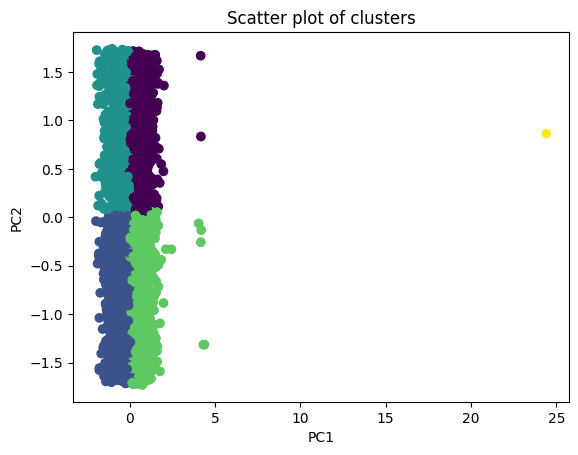

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_pca)

df_pca['cluster'] = kmeans.labels_

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of clusters')
plt.show()


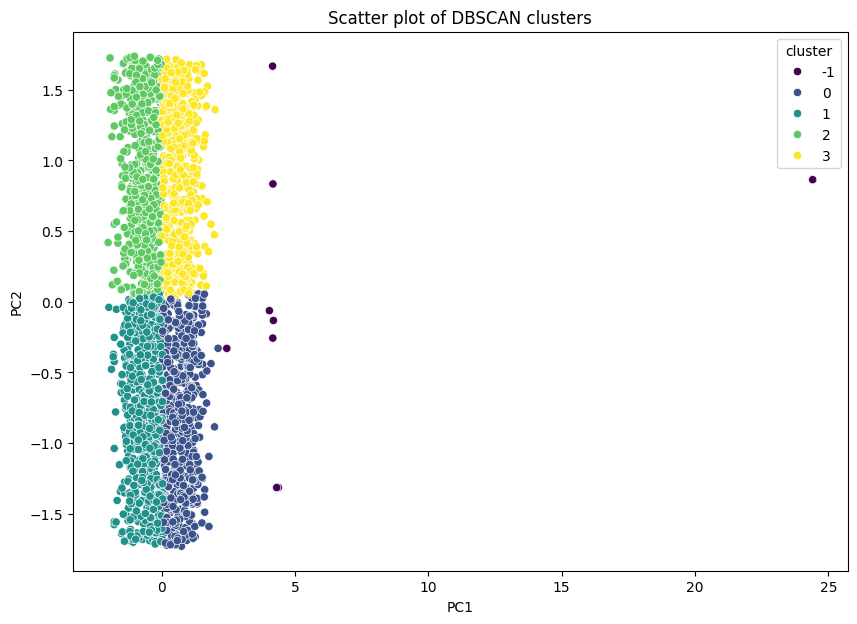

In [26]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
df_pca['cluster'] = dbscan.fit_predict(df_pca)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Scatter plot of DBSCAN clusters')
plt.show()


In [27]:
noise_indices = df_pca[df_pca['cluster'] == -1].index
df_cleaned = df.drop(noise_indices)
df_pca_cleaned = df_pca.drop(noise_indices)
df_pca=df_pca_cleaned

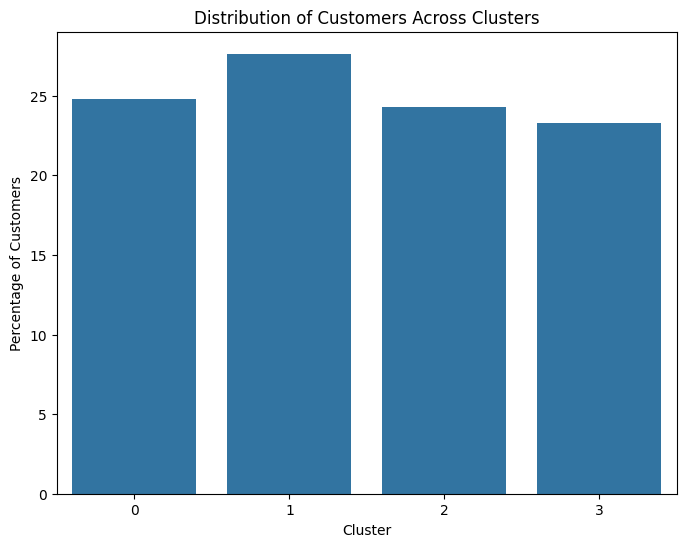

In [28]:
cluster_counts = df_pca['cluster'].value_counts()
cluster_percentages = cluster_counts / cluster_counts.sum() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_percentages.index, y=cluster_percentages.values)
plt.xlabel('Cluster')
plt.ylabel('Percentage of Customers')
plt.title('Distribution of Customers Across Clusters')
plt.show()


In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
silhouette = silhouette_score(df_pca.drop('cluster', axis=1), df_pca['cluster'])
print("Silhouette Score:", silhouette)
calinski_harabasz = calinski_harabasz_score(df_pca.drop('cluster', axis=1), df_pca['cluster'])
print("Calinski Harabasz Score:", calinski_harabasz)
davies_bouldin = davies_bouldin_score(df_pca.drop('cluster', axis=1), df_pca['cluster'])
print("Davies Bouldin Score:", davies_bouldin)

Silhouette Score: 0.38303961831893424
Calinski Harabasz Score: 2037.3530240826292
Davies Bouldin Score: 0.8811631010159029


In [30]:
df['Cluster'] = df_pca['cluster']
df_og['Cluster'] = df_pca['cluster']

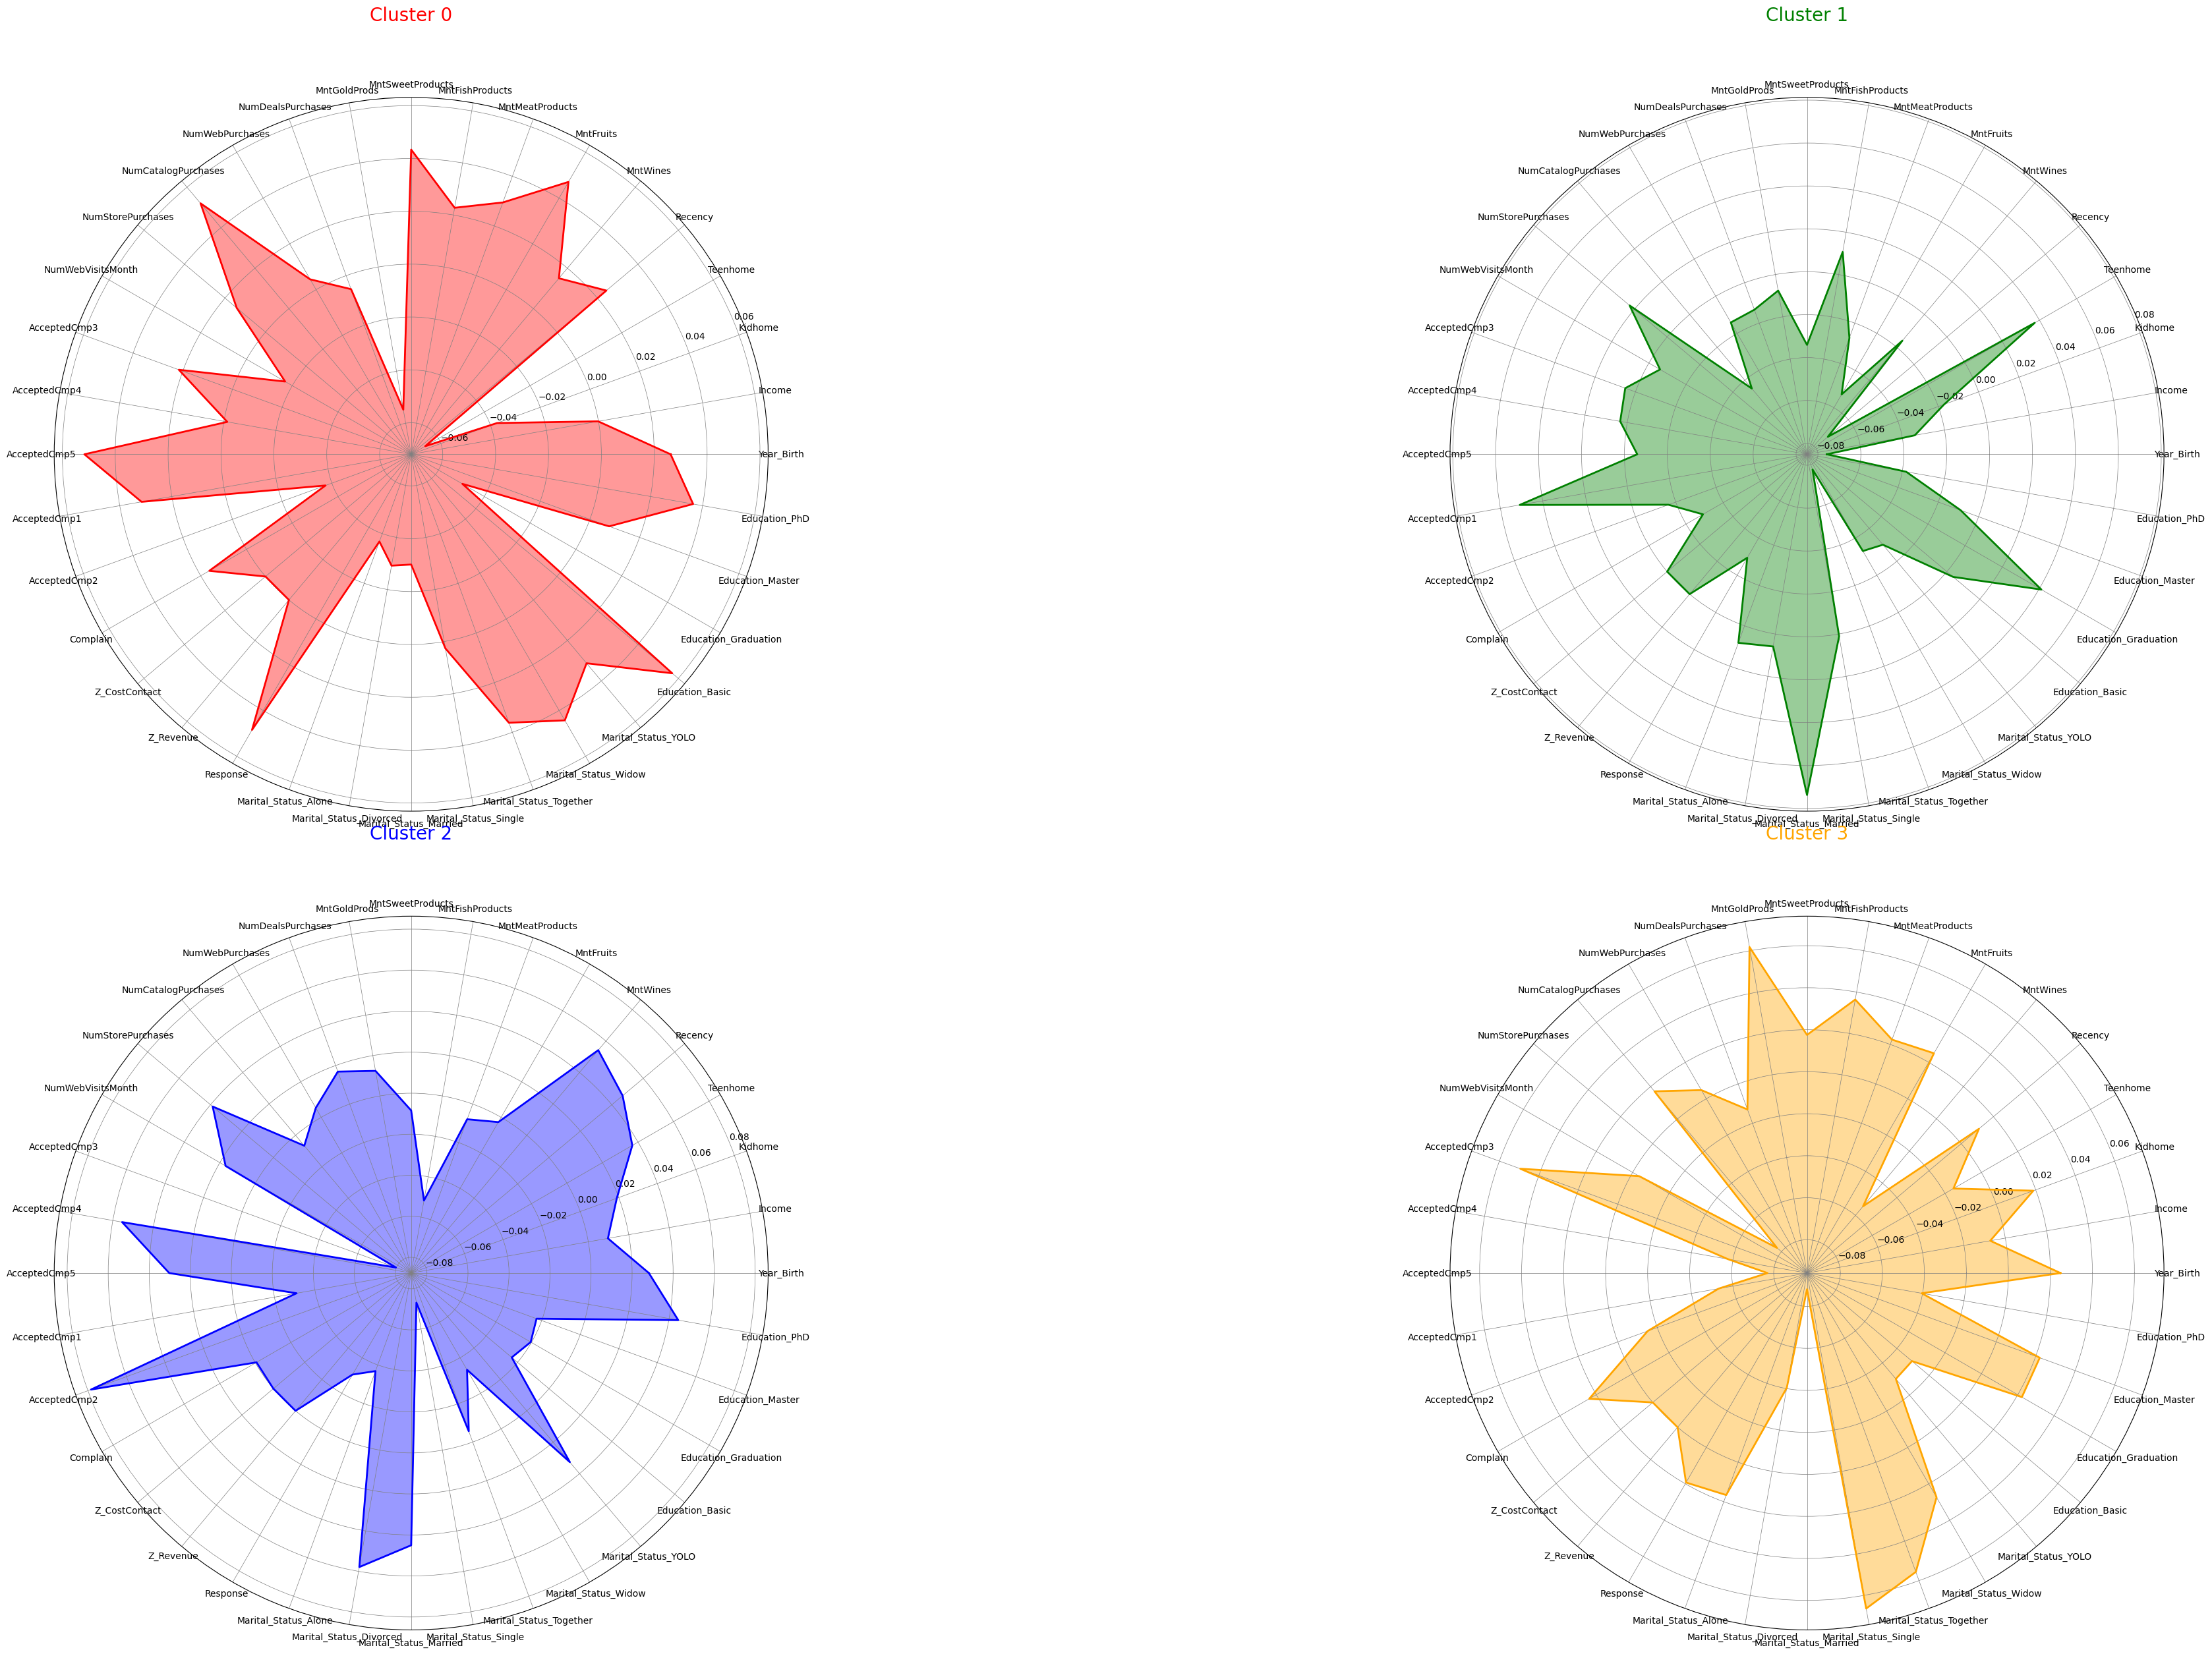

In [31]:
df_customer = df_og.set_index('ID')
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['Cluster'], axis=1))
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['Cluster'] = df_customer['Cluster']
cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

labels=np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize=(50, 25), subplot_kw=dict(polar=True), nrows=2, ncols=2)
ax = ax.flatten()


colors = ['red', 'green', 'blue', 'orange']

for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]
    create_radar_chart(ax[i], angles, data, color, i)
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])
    ax[i].grid(color='grey', linewidth=0.5)


plt.tight_layout()
plt.show()

#Profiling

#Cluster 0: High-Spending Catalogue Shoppers

* Customers in this segment demonstrate high recency and typically require
 five or more campaigns to accept an offer, indicating lower engagement and a potential risk of churning if campaigns are not executed effectively.

* The majority of their purchases are made through catalogues, with almost
 negligible expenditure on gold, though they spend a significant amount on other products.

* These customers earn an average salary; most have a basic education,
  while some hold a Ph.D.
* This segment does not include married individuals; most are widowed or
cohabiting without marriage and have no children or teenagers at home.
No complaints have been received from this segment in the past two years.








#Cluster 1: Value-Conscious Families

* Customers in this segment readily accept offers in the initial campaign
 but exhibit the lowest spending compared to other segments.

* They predominantly prefer direct store purchases, mainly spending on fish products, albeit at lower amounts relative to other segments.

* This segment comprises customers with the lowest income, which may account for their reduced purchasing behavior.

* There is a lower percentage of individuals with education beyond a bachelor's degree in this segment.

* This segment has the highest number of married individuals, most of whom have at least one child and one teenager at home. Notably, there have been no complaints from this segment in the past two years.

#Cluster 2: Luxury Lifestyle Shoppers

* Customers in this segment typically respond to offers between the second and fourth campaigns, with a selective focus on wine purchases.

* The majority of purchases occur in-store, primarily involving wine and gold products.

* This segment has the highest average income, with most customers holding a PhD.

* It also has the highest divorce rate, averaging one child or teenager in the household.

* There have been no complaints received from this segment in the past two years.

#Cluster 3: Gold Tier Customers

* The majority of customers in this segment accept the offer by the third campaign.

* Most purchases occur through the catalog and website, with this segment being the highest gold buyers.

* Customers typically spend significantly on products, except for minimal expenditure on wine.

* This segment is characterized by a high income level, with most individuals holding undergraduate or graduate degrees.

* There is a notable proportion of singles in this segment, alongside some complaints received over the past two years.

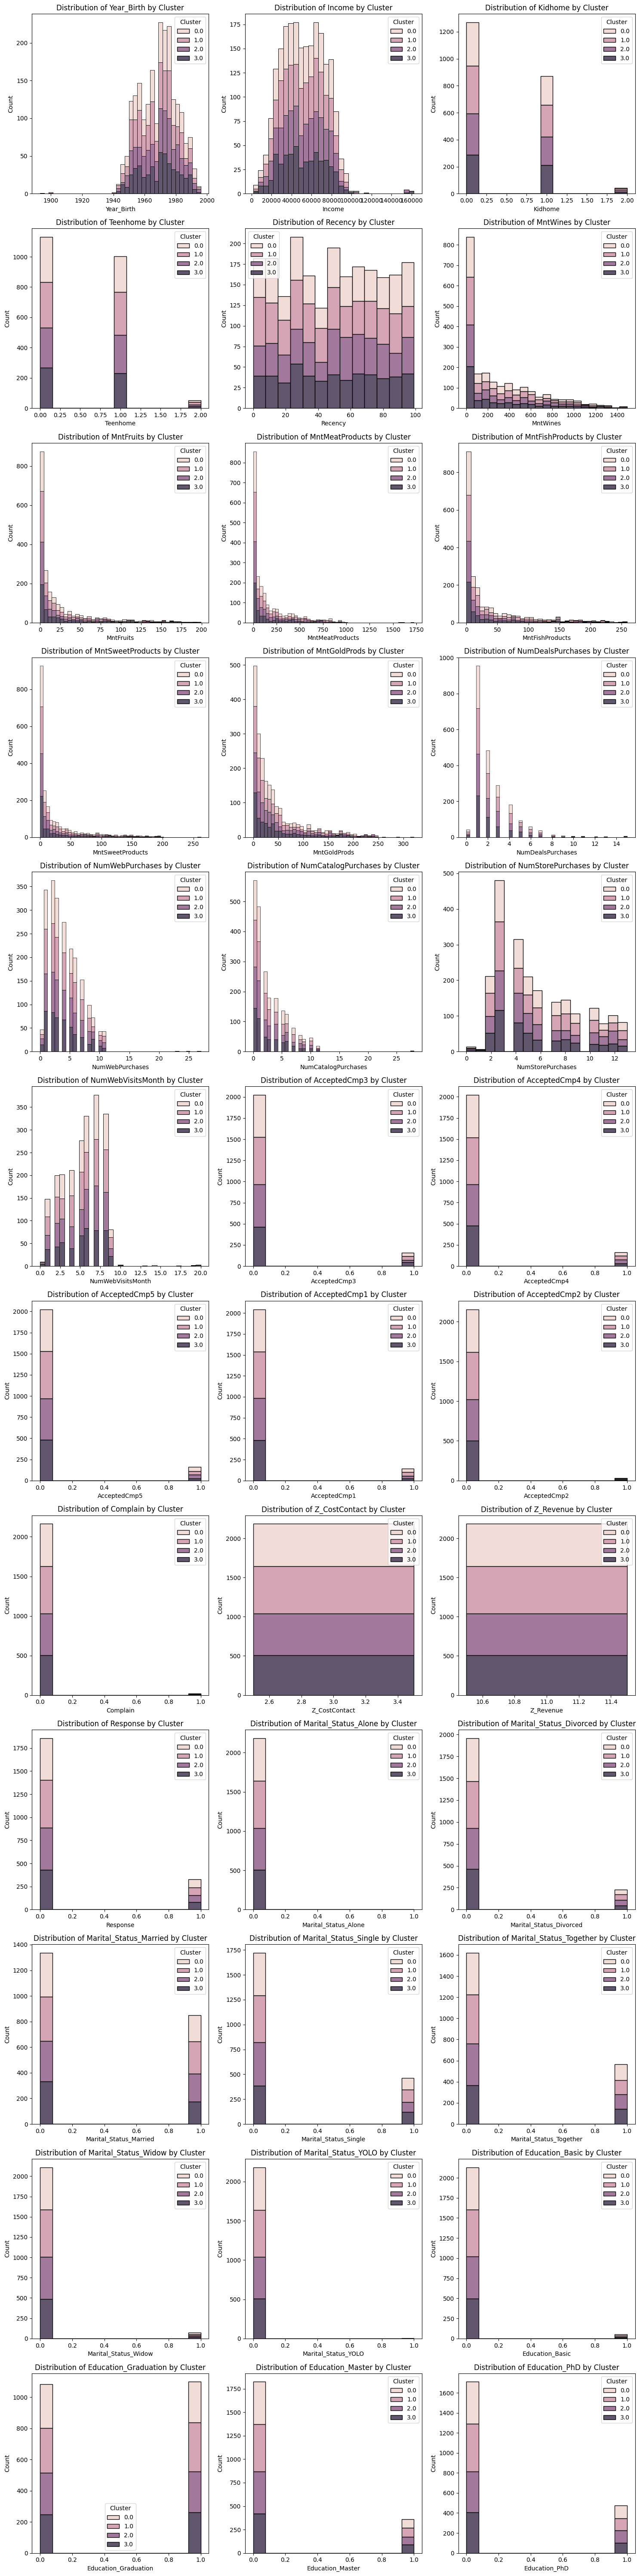

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = 3
num_rows = int(np.ceil((len(df_og.columns) - 2) / num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()
i = 0
for feature in df_og.columns:
    if feature not in ['ID', 'Cluster']:
        sns.histplot(data=df_og, x=feature, hue='Cluster', multiple='stack', ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Cluster')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        i += 1
for j in range(i, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()